In [256]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfde import Simple_CF_Descent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Naive CF-Descent

This file contains the initial attempts at making CF-Descent work and tests to see it's validity

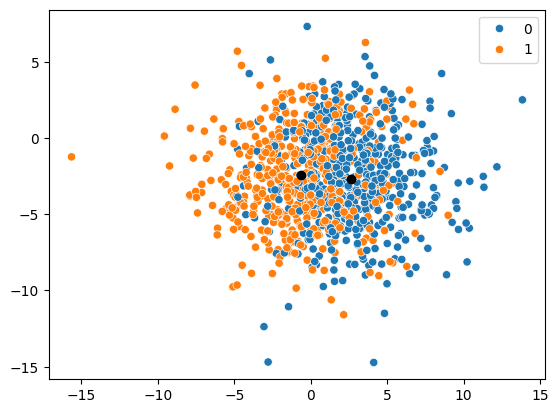

In [257]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [258]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,0.030482,-3.980753,1.0
1,1.432025,-1.284571,1.0
2,1.817310,-0.462873,1.0
3,-4.244890,-5.025284,0.0
4,1.738998,1.227312,0.0
...,...,...,...
995,-1.081191,1.020737,1.0
996,0.039376,0.816217,1.0
997,-1.452242,-11.064416,0.0
998,5.951068,-7.963364,0.0


In [259]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

Generation counterfacutal from cluster: 0.0 , Into cluster: 1.0
Features that can be changed count:  1
Amount of changes:  21
Number of changed features: 1


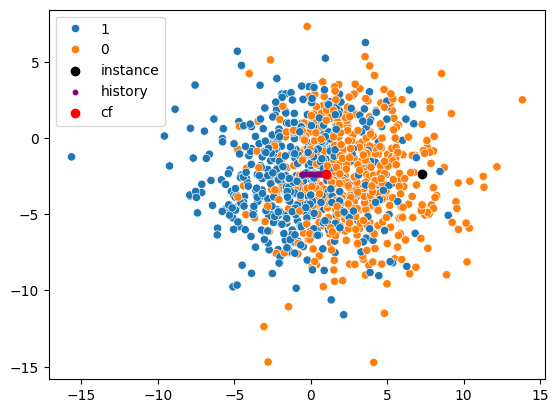

In [260]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

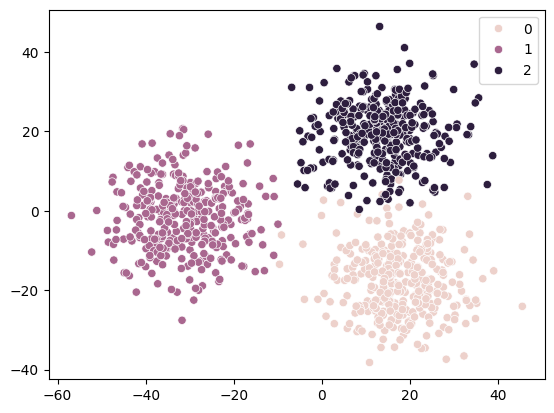

In [261]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [262]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,-20.524528,-13.772226,4.930645,1.937210,17.673349,16.195422,0.142103,19.269457,7.219558,5.523239,...,21.106705,-6.799399,-4.372032,9.619195,6.117536,17.303770,-13.265669,1.034249,-6.689490,2.0
1,-0.136200,0.956324,-4.655635,-3.338693,-5.508303,18.300411,2.140168,4.058772,-1.035564,10.810906,...,-1.046973,-12.072219,-0.083868,-23.900644,4.555821,7.076064,1.731103,-14.096891,-6.367692,2.0
2,26.651517,7.680539,19.617193,-10.619725,-4.994009,-17.124257,-4.311903,6.488769,6.107266,12.422179,...,-5.839190,4.346364,24.110472,-5.014314,3.498635,1.417335,-0.695292,11.611410,9.695361,1.0
3,-6.833710,11.670795,12.077956,-9.307622,7.152710,-8.640628,0.627083,7.087325,3.159724,7.658853,...,-12.770108,9.665156,9.606106,-15.464407,-2.455370,7.641645,21.654656,-4.460360,7.570683,1.0
4,3.931248,13.145338,-4.021570,7.455394,-2.668902,7.992929,-1.028509,4.662122,8.792042,-3.325520,...,-4.798336,1.238455,11.690800,7.484324,-9.141188,16.016460,11.186034,-13.322455,6.278380,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.967375,3.141132,14.302248,-22.519782,0.760369,-13.241288,3.567144,3.658961,6.837386,1.039266,...,-8.756044,4.785968,11.038949,-2.803103,3.178102,31.828464,3.745472,-8.369890,14.695041,1.0
996,8.178114,24.072796,11.417470,-7.984046,-16.701783,-7.319432,12.920025,-11.549214,7.453446,14.560976,...,-2.317671,-0.892239,-3.110971,5.407284,1.821227,1.053814,2.710615,3.486246,8.506732,1.0
997,-12.319209,-2.114758,6.388251,5.271095,-9.824308,7.371524,-2.732501,4.813241,-9.086039,-11.964626,...,3.106177,-18.486075,15.590452,1.435490,10.260640,-3.983474,4.548352,-12.950300,-10.275454,0.0
998,-9.805739,-4.993398,5.099923,-3.913407,-0.973482,8.850360,-1.340244,1.003133,-6.003290,13.982362,...,12.982249,-12.131895,13.859934,-5.717428,-8.557878,4.841758,-19.115458,6.077164,-0.226638,2.0


In [263]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

Generation counterfacutal from cluster: 0.0 , Into cluster: 1.0
Features that can be changed count:  14
Amount of changes:  2
Number of changed features: 2


In [264]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

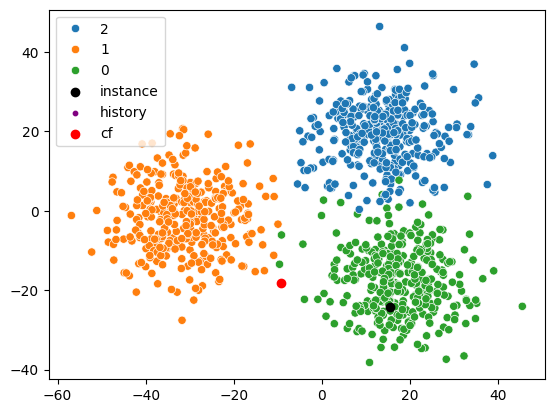

In [265]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.legend()